#### 2.3 Python Refresher

This section is short because I have already gone through this before and I cannot find my old notes.

##### numpy

In [2]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x.ndim, "- number of dimensions")
print(x.dtype, "- data type")
print(np.array([1,2.0]).dtype, "- data type if one object is a float")
print(x.shape, "- length in each dim")

2 - number of dimensions
int64 - data type
float64 - data type if one object is a float
(2, 2) - length in each dim


In [3]:
x = np.array([1, 2, 3, 4])
print(x.sum(), "=", np.sum(x), "= sum")

10 = 10 = sum


In [4]:
x = np.array([1,2,3,4,5,6])
print(x)
x_reshaped = x.reshape((2,3))
print(x_reshaped) # reshaped based on (dim1, dim2)
print(x_reshaped[0,0]) # zero based indexing
print(x_reshaped**2,"\n", np.sqrt(x_reshaped))

[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]
1
[[ 1  4  9]
 [16 25 36]] 
 [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]


In [5]:
x = np.random.normal(size = 50) # 50 random vars from X ~ N(0,1)
y = x + np.random.normal(loc = 50, scale=1, size = 50) # Y = X + N(50,1)
# loc = mean, scale = sd
rng = np.random.default_rng(3) # sets seed of randomness

In [6]:
y = rng.standard_normal(10)

print(y.mean(), y.var(), np.mean((y - y.mean())**2)) # mean, var, and std are functions too
print(np.std(y), np.sqrt(np.var(y)))


-0.1126795190952861 2.7243406406465125 2.7243406406465125
1.6505576756498128 1.6505576756498128


In [7]:
X = rng.standard_normal((10,3))
X.mean(axis=0) # 0 = mean across rows, 1 = columns...

array([ 0.15030588,  0.14030961, -0.34238602])

##### matplotlib

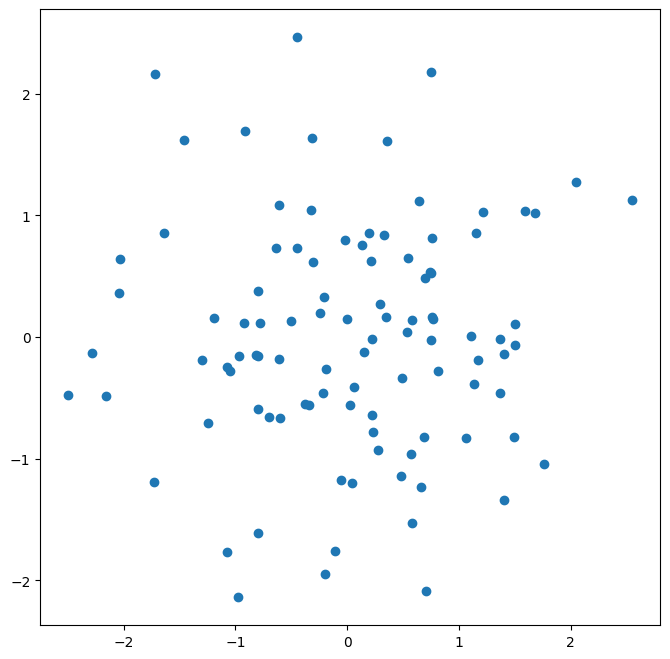

In [8]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize = (8,8)) # subplots creates a tuple of length two, unpacked into fig and ax
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x,y, "o")


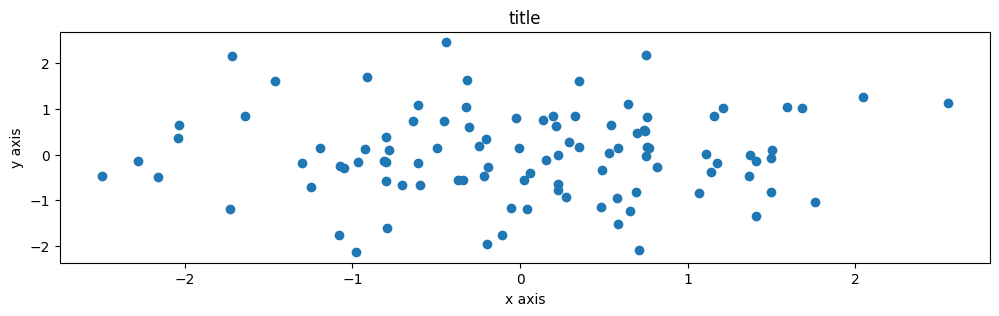

In [9]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(x,y, marker = "o"); # semicolon prevents printing of text
ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_title("title")
fig.set_size_inches(12,3)
fig;

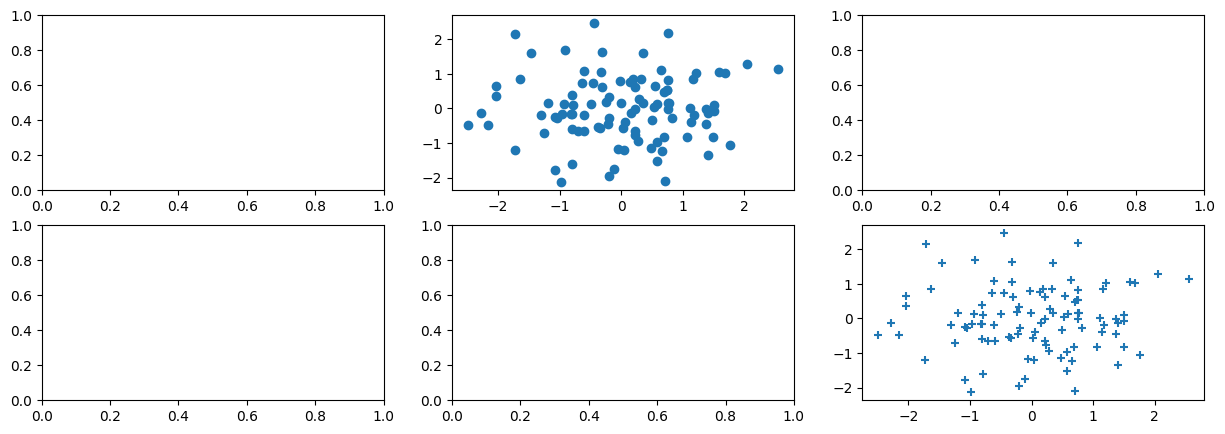

In [10]:
fig, axes = subplots(nrows=2, ncols=3, figsize=(15,5))
axes[0,1].plot(x,y,'o')
axes[1,2].scatter(x,y,marker="+")
fig.savefig("Figure.png", dpi=400); # dpi = dots per inch (size)

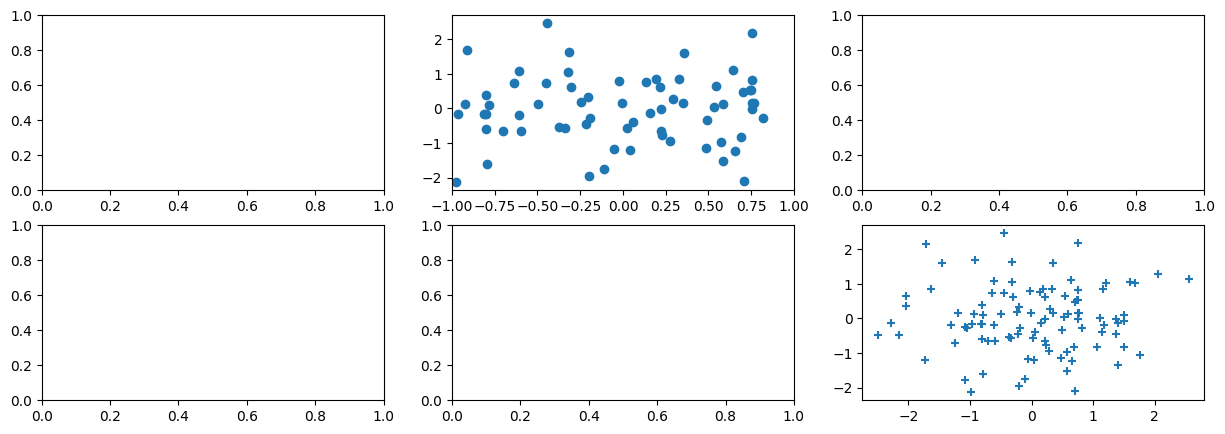

In [11]:
axes[0,1].set_xlim([-1,1]) # limits the x axis for the graph [0,1] to only [-1,1]
fig.savefig("Figure_updated.jpg")
fig


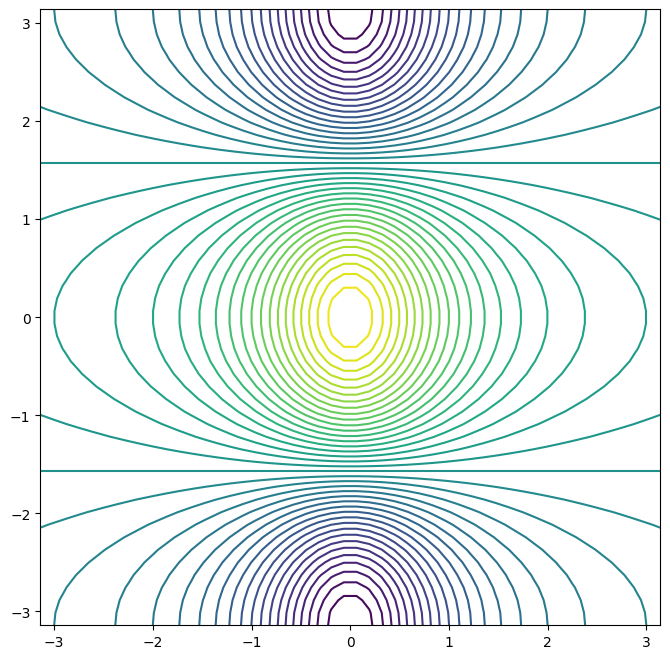

In [12]:
# The following demonstrates a contour plot for three dimensional data
fig, ax = subplots(figsize=(8,8)) 
x = np.linspace(-np.pi, np.pi, 50) # dim1, linspace(a,b,n) returns a vector of n numbers from a to b
y = x # dim2
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) # z value for each pair (x,y)
ax.contour(x,y,f, levels = 45)


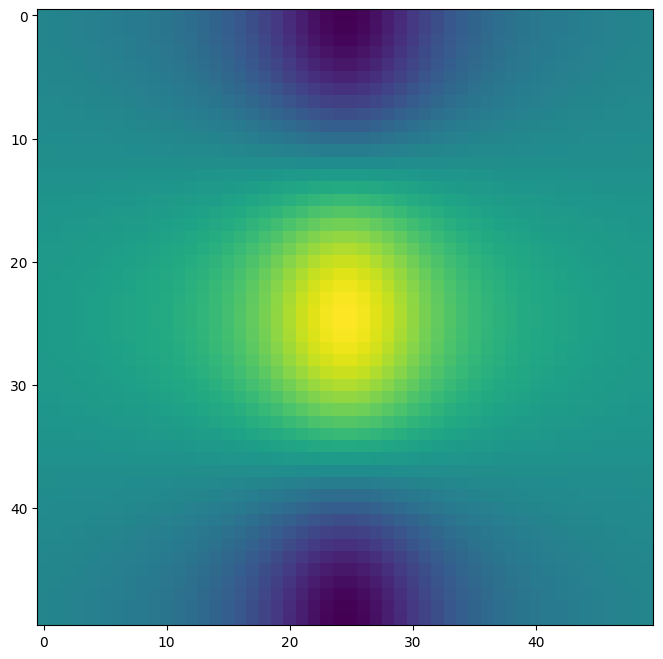

In [13]:
fig, ax = subplots(figsize=(8,8))
ax.imshow(f); # heatmap rather than counter plot. used for temperature in weather forecasts


##### sequences, slicing, indexing

In [14]:
seq1 = np.linspace(0,10,11) # (a,b,n) where (a,b) is range, n = # of numbers
seq2 = np.arange(0,10) # (a,b,n) where (a,b) is range, n = step
seq1, seq2

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [15]:
"hello world"[3:6]
"hello world"[slice(3,6)]

'lo '

In [16]:
A = np.array(np.arange(16)).reshape((4,4))
A, A[1,2], A[[1,3]] 
# A[1,2] gets one element
# A[[1,3]] selects rows 1-3 (zero based indexing)

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 np.int64(6),
 array([[ 4,  5,  6,  7],
        [12, 13, 14, 15]]))

In [17]:
A[:,[0,2]] 
# A[rows, cols]
# rows = : means all rows
# cols = [0,2] means columns 0 and 2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [18]:
A[[1,3],[0,2]]

array([ 4, 14])

In [19]:
print(A[[1,3]][:,[0,2]]) #.. or alt:
idx = np.ix_([1,3],[0,2,3]) # creates an intermediate mesh object
A[idx]

[[ 4  6]
 [12 14]]


array([[ 4,  6,  7],
       [12, 14, 15]])

In [20]:
keep_rows = np.zeros(A.shape[0],bool)
#np.zeros(arr shape, bool) means turn all values in arr into zero, but bool turns it into False
#A.shape[0] is a 4 element array, so = 4
keep_rows[[1,3]] = True # change 1 and 3 to True
A[keep_rows] # demonstrates boolean indexing
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0,2,3]] = True
idx_bool = np.ix_(keep_rows, keep_cols) # as before. dtypes can be bool or indices or both
A[idx_bool]


array([[ 4,  6,  7],
       [12, 14, 15]])

##### loading and pandas

In [30]:
import pandas as pd
Auto = pd.read_csv("data/Auto.csv") # can also do pd.read_csv("data/Auto.data", delim_whitespace=True)
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
print(Auto['horsepower']) # the dtype for the column is object (as opposed to int/float which is what you would expect)
print(np.unique(Auto['horsepower'])) # checking unique values shows presence of '?' which is in place for missing values
Auto = pd.read_csv("data/Auto.csv", na_values=["?"])
Auto['horsepower'] # now gives us float64

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64
[ 46.  48.  49.  52.  53.  54.  58.  60.  61.  62.  63.  64.  65.  66.
  67.  68.  69.  70.  71.  72.  74.  75.  76.  77.  78.  79.  80.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.  98. 100. 102. 103. 105. 107. 108. 110. 112. 113. 115. 116.
 120. 122. 125. 129. 130. 132. 133. 135. 137. 138. 139. 140. 142. 145.
 148. 149. 150. 152. 153. 155. 158. 160. 165. 167. 170. 175. 180. 190.
 193. 198. 200. 208. 210. 215. 220. 225. 230.  nan]


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 397, dtype: float64

In [ ]:
Auto = Auto.dropna()
# row operations
print(Auto[:3]) # subset row by slicing
idx = Auto['year'] > 80 # creates an array of booleans which is used as an intermediate to subset
print(Auto[idx])

# col operations
print(Auto[['mpg', 'horsepower']]) # passing in an array allows for column selection

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
338  27.2          4         135.0        84.0    2490          15.7    81   
339  26.6          4         151.0        84.0    2635          16.4    81   
340  25.8          4         156.0        92.0    2620          14.4    81   
341  23.5          6         173.0       110.0    2725          12.6    81   
342  30.0          4         135.0        84.0    2385          12.9    81   
343  39.1          4          79.0        58.0    1755          16.9   

In [ ]:
# setting the index
print(Auto.index) # the index was not set initially so its just a column of numbers
Auto_re = Auto.set_index('name')
print(Auto_re)
print(Auto_re.columns) # name is no longer in columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)
                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0       130.0    3504   
buick skylark 320          15.0          8         350.0       165.0    3693   
plymouth satellite         18.0          8         318.0       150.0    3436   
amc rebel sst              16.0          8         304.0       150.0    3433   
ford torino                17.0          8         302.0       140.0    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0        86.0    2790   
vw pickup                  44.0          4          97.0        52.0    2130   
dodge rampage              32.0          

In [52]:
# more row operations
# now that the index has been set, we can use .loc and pass in index names to select rows:
rows = ['amc rebel sst', 'ford torino']
print(Auto_re.loc[rows])
# .loc allows for selection of rows and cols by condition too:
idx_80 = Auto_re['year'] > 80
print(Auto_re.loc[idx_80, ['weight', 'origin']].head())
print("lambda\n", Auto_re.loc[lambda df: df['year'] > 80, ['weight']]) # also works so we dont have to declare idx_80
# .loc allows for chaining multiple conditions:
print(Auto_re.loc[lambda df: (df['displacement'] < 300) \
                  & (df.index.str.contains('ford') | df.index.str.contains('datsun')), \
                  ['weight', 'origin']])

# .iloc allows for selection of rows and columns (1st and 2nd args)
print(Auto_re.iloc[[3,4],0:3]) # rows 3,4 and cols 0-2


                mpg  cylinders  displacement  horsepower  weight  \
name                                                               
amc rebel sst  16.0          8         304.0       150.0    3433   
ford torino    17.0          8         302.0       140.0    3449   

               acceleration  year  origin  
name                                       
amc rebel sst          12.0    70       1  
ford torino            10.5    70       1  
                        weight  origin
name                                  
plymouth reliant          2490       1
buick skylark             2635       1
dodge aries wagon (sw)    2620       1
chevrolet citation        2725       1
plymouth reliant          2385       1
lambda
                                    weight
name                                     
plymouth reliant                     2490
buick skylark                        2635
dodge aries wagon (sw)               2620
chevrolet citation                   2725
plymouth reliant  

##### nan handling

In [53]:
# zip function in py:
total = 0
for val, wgt in zip([2,3,4],[0.2,0.3,0.4]): total += wgt * val
print(total)

2.9


In [68]:
# string formatting
rng = np.random.default_rng(1)
A = rng.standard_normal((127,5)) # X ~ N(0,1), 127 columns, 5 rows
M = rng.choice([0,np.nan], p=[0.8,0.2], size=A.shape) # same size df as A but with 20% columns missing
A += M # if M = 0, then A = normal value, else if M = nan, A = nan
D = pd.DataFrame(A, columns = ['foo','bar','fiz','buz','fuz']) # df with these cols

persum = 0
for col in D.columns:
    template = 'Column "{0}" has {1:.2%} missing values'
    print(template.format(col, np.isnan(D[col]).mean()))
    persum += np.isnan(D[col]).mean()

print(persum)
# NB: np.isnan(D['fiz']) returns bol array of if value is nan
# np.isnan(D['fiz']).mean() takes the % of values. sum seems to also work on this.

Column "foo" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "fiz" has 29.13% missing values
Column "buz" has 21.26% missing values
Column "fuz" has 22.83% missing values
1.15748031496063


##### more on matplotlib

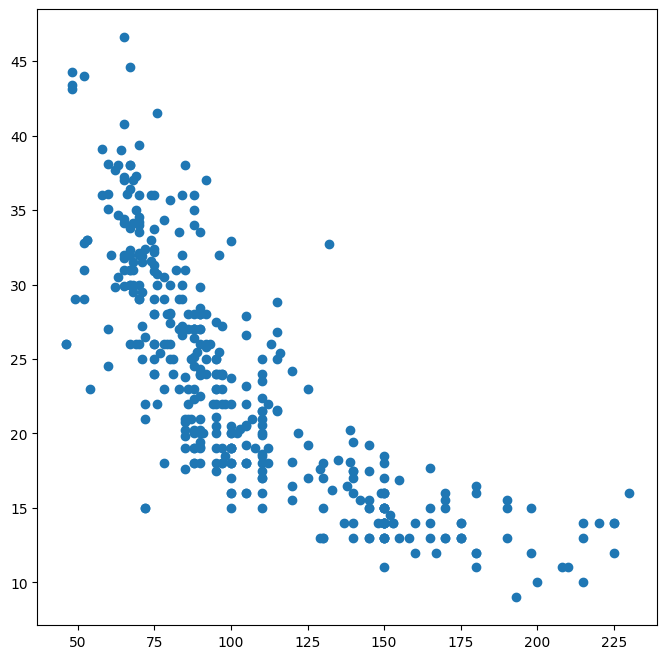

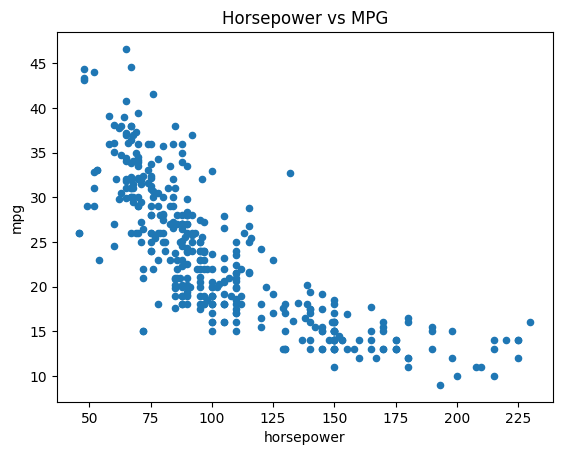

In [72]:
from matplotlib.pyplot import subplots
fig, ax = subplots(figsize = (8,8)) # subplots creates a tuple of length two, unpacked into fig and ax
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');
ax = Auto.plot.scatter('horsepower', 'mpg') # alternate to above

ax.set_title('Horsepower vs MPG')
fig = ax.figure
fig.savefig('horsepower_mpg.png')

<Axes: xlabel='horsepower', ylabel='mpg'>

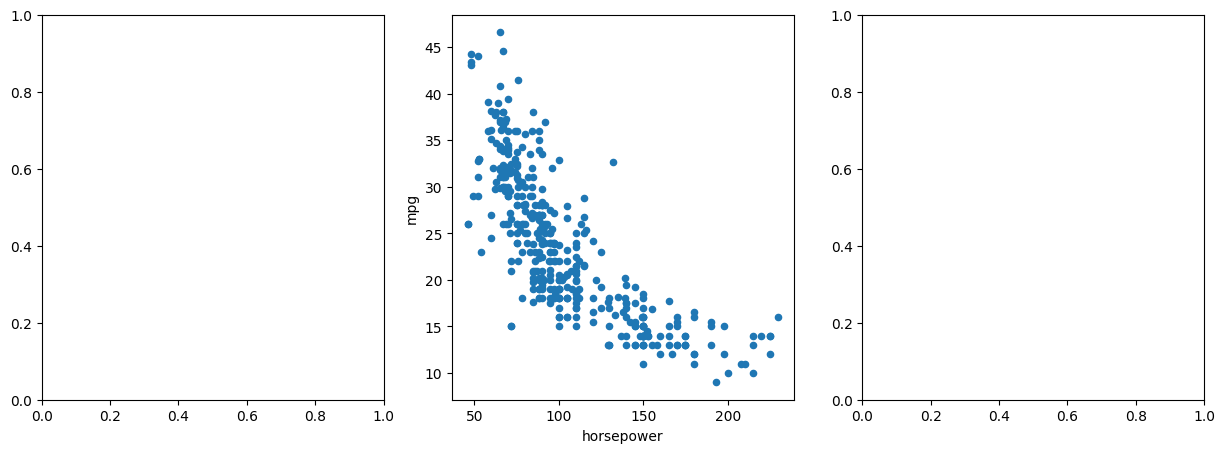

In [77]:
fig, axes = subplots(ncols=3, figsize=(15,5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1])

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

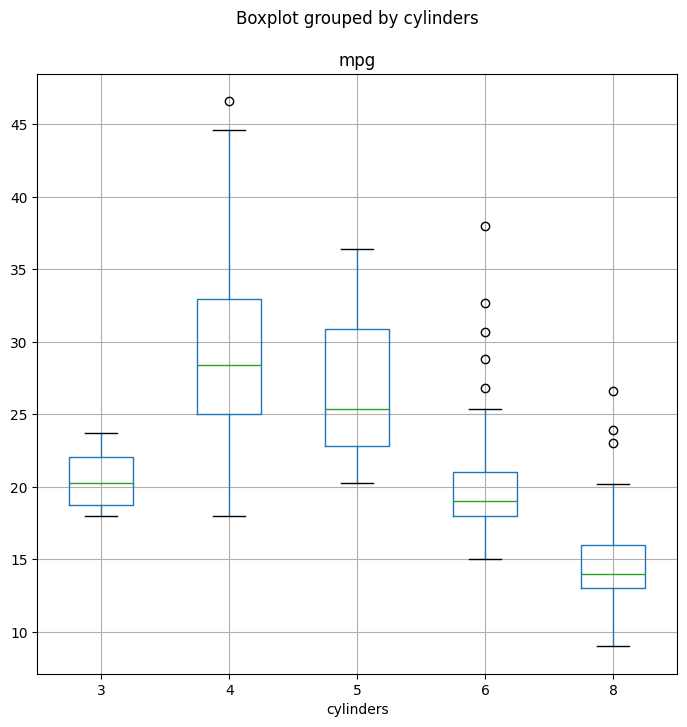

In [ ]:

# There are only a few number of cylinders, so we can turn it from quantitative to categorical
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
fig, ax = subplots(figsize=(8,8))
Auto.boxplot('mpg', by='cylinders', ax=ax)
# Since the data is now qualitative, we can plot a boxplot

array([<Axes: title={'center': 'mpg'}>], dtype=object)

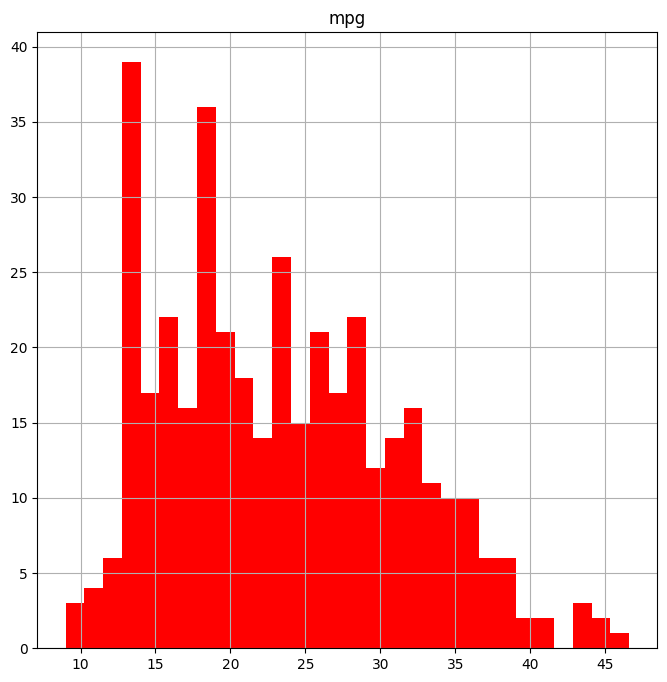

In [81]:
fig,ax = subplots(figsize = (8,8))
Auto.hist('mpg', color='red', bins=30, ax=ax) #histogram

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>]], dtype=object)

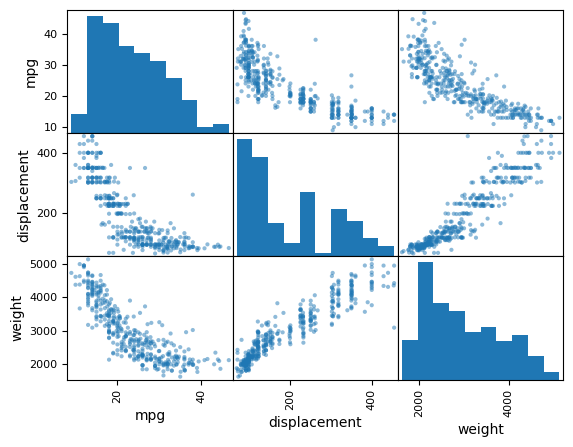

In [ ]:
pd.plotting.scatter_matrix(Auto[['mpg','displacement','weight']])
# Allows for plotting all pairwise relationships for the data

In [85]:
print(Auto['mpg'].describe())
print(Auto[['mpg','weight']].describe())

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
              mpg       weight
count  392.000000   392.000000
mean    23.445918  2977.584184
std      7.805007   849.402560
min      9.000000  1613.000000
25%     17.000000  2225.250000
50%     22.750000  2803.500000
75%     29.000000  3614.750000
max     46.600000  5140.000000


#### 2.4 Exercises

##### 10. Boston Housing

In [89]:
### a)
from ISLP import load_data
df = load_data('Boston')

In [ ]:
### b)
np.shape(df) # 506 rows, 13 columns

(506, 13)

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: x

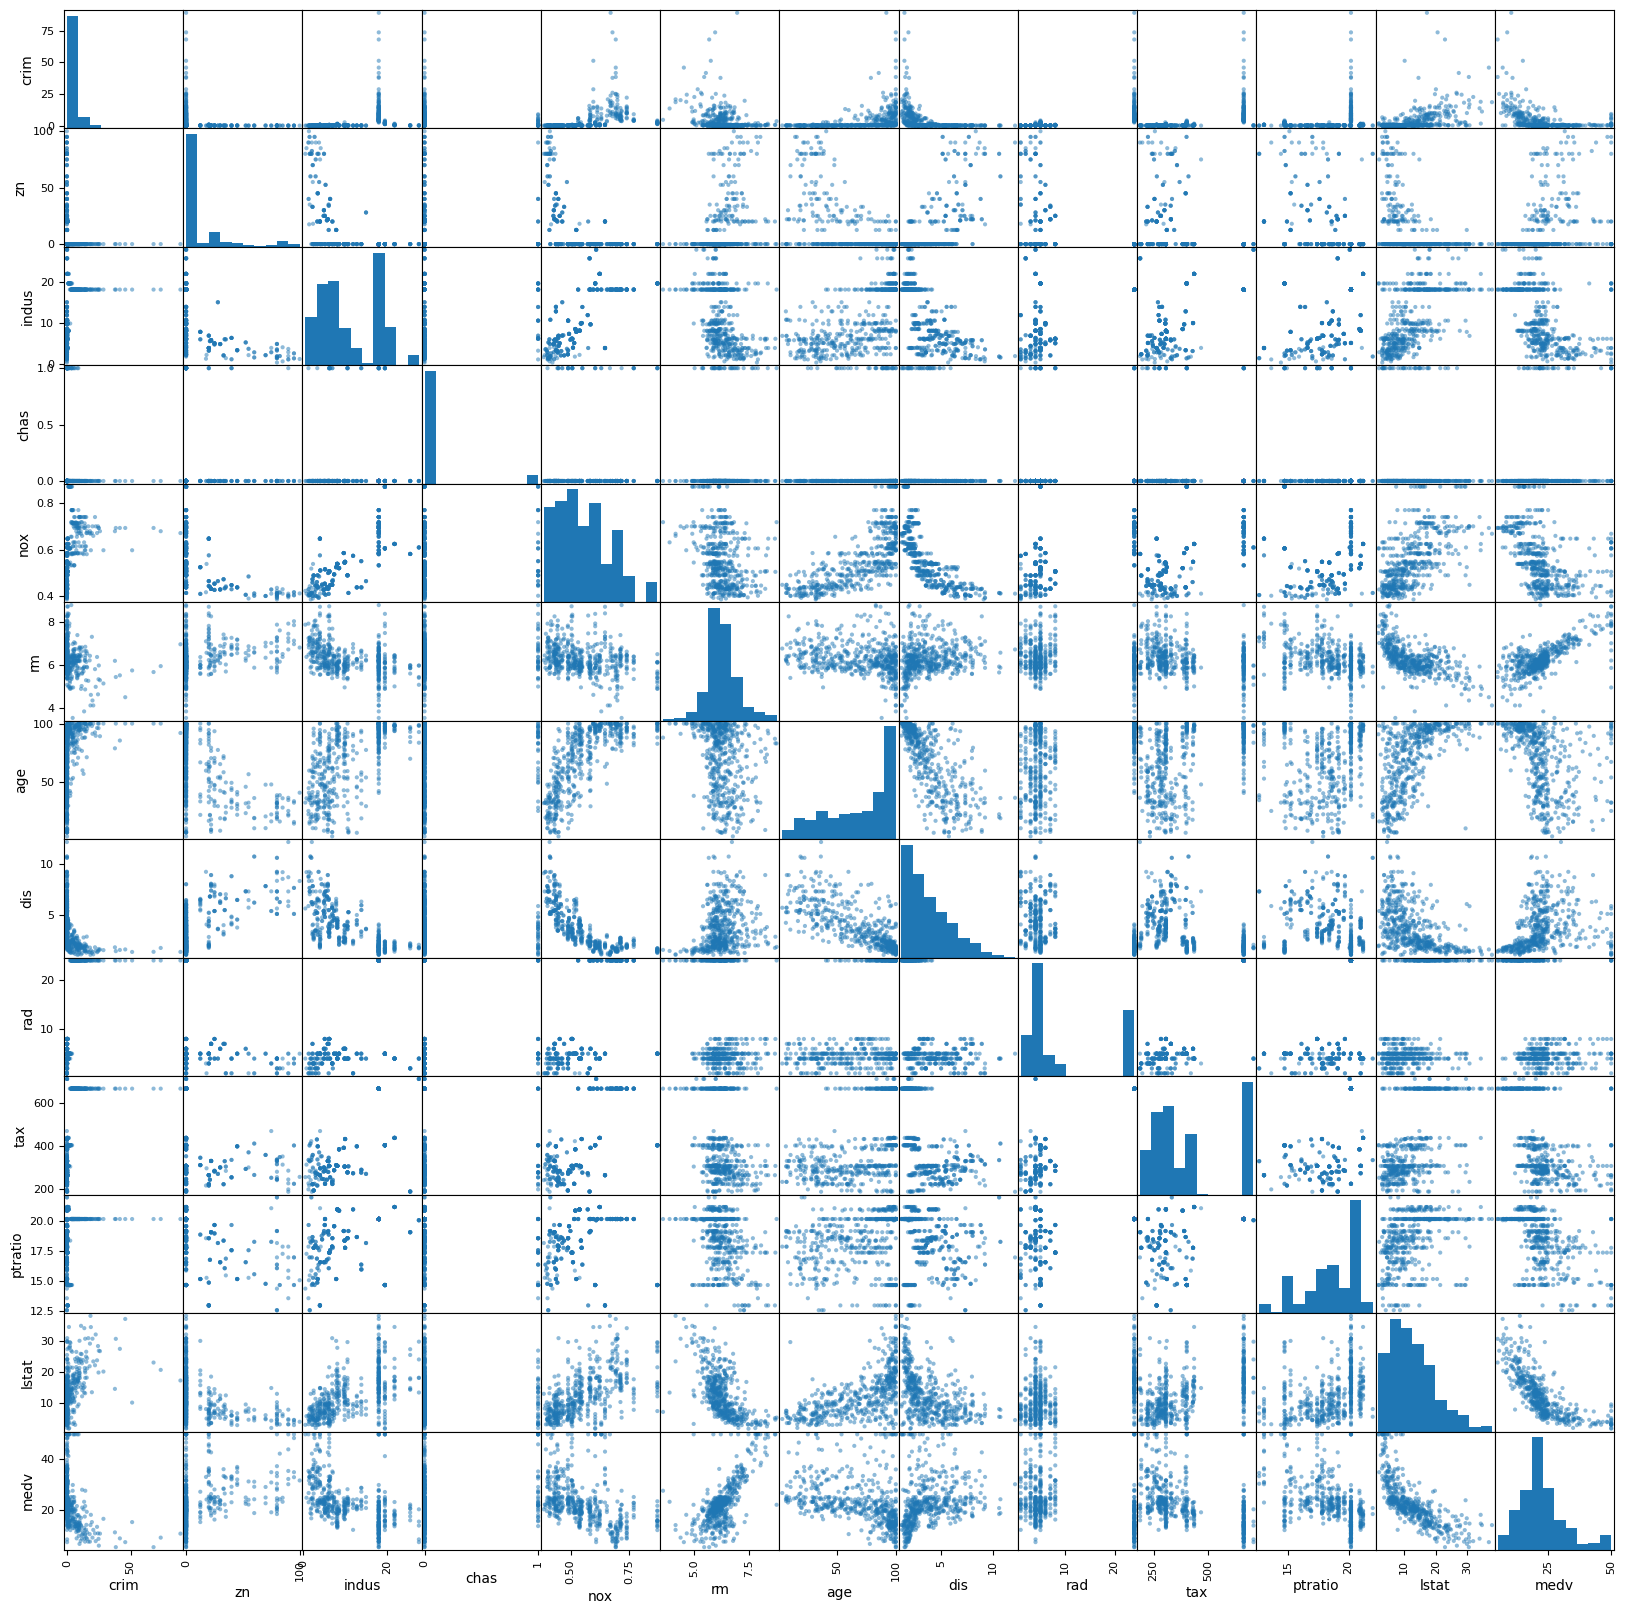

In [ ]:
### c) 
pd.plotting.scatter_matrix(df[df.columns],figsize=(20,20))
'''
Positive correlation:
medv vs rm
lstat vs nos
lstat vs indus
age vs nos

Negative correlation:
medv vs indus
lstat vs m
dis vs indus
dis vs nox
dis vs age
'''

In [ ]:
### d)
# crim = per capita crime rate
# crim tends to be high at high ages and low dis
# You would expect higher crime rates in older areas and areas with more infrastructure (ie closer to employment centres)?

In [ ]:
### e) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

df['crim'].sort_values() 
# Crime rates range from 88.97 to 0.006. Highest crime rates at 380, 418, 405, 410, 414

df['tax'].sort_values().tail(20) 
# Tax rates range from 711 to 187. Highest tax rates at 488-492.

df['ptratio'].sort_values() 
# Ptratios range from 22 to 12.6. Highest ptratios at 127, 128, 135, 355, 354



198    12.6
196    12.6
197    12.6
260    13.0
264    13.0
       ... 
127    21.2
128    21.2
135    21.2
355    22.0
354    22.0
Name: ptratio, Length: 506, dtype: float64

In [ ]:
### f)How many of the suburbs in this data set bound the Charles river?

df['chas'].sum() # 35 true values
df.loc[lambda x: x['chas'] == True, ['chas']].count() # 35 true values


np.int64(35)

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

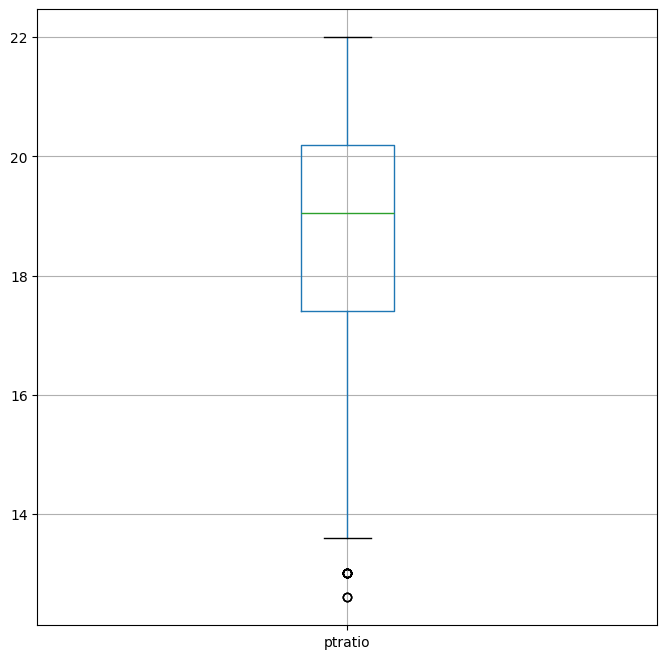

In [ ]:
### g) What is the median pupil-teacher ratio among the towns in this data set?

fig, ax = subplots(figsize=(8,8))
df.boxplot('ptratio', ax=ax) # median is around 19

df['ptratio'].describe() # median is 19.05

In [128]:
### h) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictor for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

df['medv'].sort_values() # 398 and 405 have the lowest medv
df.iloc[[398,405]]

# 405:
# Elevated crime rates, high tax, high ptratio

# 398:
# Medium crime rates, high tax, high ptratio


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [ ]:
### i) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

moreThan7 = df.loc[lambda x: x['rm'] > 7]
moreThan8 = df.loc[lambda x: x['rm'] > 8]

moreThan7.count() # 64 with more than 7
moreThan8.count() # 13 with more than 8

moreThan8
# medvs tend to be in the 40+ range, which is what you would expect
# ages tend to be >70.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0
